In [ ]:
import numpy as np
from qiskit.quantum_info import Statevector
from IPython.display import display, Markdown
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
import random
from itertools import combinations
import math
import itertools
from qiskit_aer import AerSimulator
from sympy import Matrix, GF
import galois

# Deustch Algorithm
https://www.youtube.com/watch?v=LTftC-eTLM0

In [ ]:
def deustch_function(case: int, size, input_bit_index):
    if case not in [0, 1, 2, 3]:
        print(case)
        raise ValueError("`case` must be 0, 1, 2, or 3.")

    f = QuantumCircuit(size)
    if case in [1, 2]:
        f.cx(input_bit_index, input_bit_index + 1)
    if case in [2, 3]:
        f.x(input_bit_index + 1)
    return f

## D1
Sukurkite qiskit/pennylane schemą, kuri turi 3 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja Deustsch algoritmą. Schema turi atsakyti į klausimą ar bent viena iš tų funkcijų yra subalansuota.

In [ ]:
f_amount = 3


# Initialize
zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')
circuit = QuantumCircuit(f_amount*2 + 1, 1)
circuit.initialize(zero_qubit, f_amount * 2)
for i in range(f_amount):
    circuit.initialize(zero_qubit, i * 2)
    circuit.h(0 + i * 2)
    circuit.initialize(one_qubit, 1 + i * 2)
    circuit.h(1 + i * 2)

# Oracle
circuit.barrier()
for i in range(f_amount):
    circuit.compose(deustch_function(i, f_amount*2, i * 2), inplace=True)
circuit.barrier()

# Post Oracle Hadamar
for i in range(f_amount):
    circuit.h(i * 2)

# All Result Qubit OR to Last Qubit
numbers_list = [2 * x for x in range(f_amount)]
matches = []
for r in range(1, f_amount + 1):
    matches.extend([list(comb) for comb in combinations(numbers_list, r)])
for match in matches:
    circuit.mcx(match, f_amount*2)
    
# Measure to Classical Bit
circuit.measure(f_amount*2, 0)


circuit.draw('mpl')


In [ ]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

# D2
Sukurkite qiskit/pennylane schemą, kuri turi 3 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja Deustsch algoritmą. Schema turi atsakyti į klausimą KIEK iš tų funkcijų yra subalansuotų.

In [ ]:
f_amount = 3


# Initialize
zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')
circuit = QuantumCircuit(f_amount*2 + 1, 1)
circuit.initialize(zero_qubit, f_amount * 2)
for i in range(f_amount):
    circuit.initialize(zero_qubit, i * 2)
    circuit.h(0 + i * 2)
    circuit.initialize(one_qubit, 1 + i * 2)
    circuit.h(1 + i * 2)

# Oracle
circuit.barrier()
for i in range(f_amount):
    circuit.compose(deustch_function(i, f_amount*2, i * 2), inplace=True)
circuit.barrier()

# Post Oracle Hadamar
for i in range(f_amount):
    circuit.h(i * 2)

# All Result Qubit AND to Last Qubit
numbers_list = [2 * x for x in range(f_amount)]
circuit.mcx(numbers_list, f_amount*2)
    
# Measure to Classical Bit
circuit.measure(f_amount*2, 0)


circuit.draw('mpl')


In [ ]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

# D3
Sukurkite qiskit/pennylane schemą, kuri turi 3 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja Deustsch algoritmą. Schema turi atsakyti į klausimą KIEK iš tų funkcijų yra subalansuotų.

In [ ]:
f_amount = 3 # NOT CHANGEABLE

# Initialize
zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')
circuit = QuantumCircuit(f_amount * 2 + 2 + 3, 2)

for i in range(3):
    circuit.initialize(zero_qubit, i * 2)
    circuit.h(0 + i * 2)
    circuit.initialize(one_qubit, 1 + i * 2)
    circuit.h(1 + i * 2)
circuit.initialize(zero_qubit, f_amount * 2)
circuit.initialize(zero_qubit, f_amount * 2 + 1)

# Oracle
circuit.barrier()
for i in range(f_amount):
    circuit.compose(deustch_function(i, f_amount*2, i * 2), inplace=True)
circuit.barrier()

# Post Oracle Hadamar
for i in range(f_amount):
    circuit.h(i * 2)

# Summing
sum_bits = [0, 2, 4]
least_index = f_amount * 2
most_index = f_amount * 2 + 1
intermediate_1 = f_amount * 2 + 2
intermediate_2 = f_amount * 2 + 3
intermediate_3 = f_amount * 2 + 4

# Least bit
circuit.cx(sum_bits[0], least_index)
circuit.cx(sum_bits[1], least_index)
circuit.cx(sum_bits[2], least_index)

# Most bit
circuit.ccx(sum_bits[0], sum_bits[1], intermediate_1)
circuit.ccx(sum_bits[0], sum_bits[2], intermediate_2)
circuit.ccx(sum_bits[1], sum_bits[2], intermediate_3)

circuit.cx(intermediate_1, most_index)
circuit.cx(intermediate_2, most_index)
circuit.cx(intermediate_3, most_index)

circuit.mcx([intermediate_1, intermediate_2], most_index)
circuit.mcx([intermediate_1, intermediate_3], most_index)
circuit.mcx([intermediate_2, intermediate_3], most_index)

circuit.mcx([intermediate_1, intermediate_2, intermediate_3], most_index)


circuit.barrier()

# Measure to Classical Bit
circuit.measure(f_amount*2, 0)
circuit.measure(f_amount*2 + 1, 1)


circuit.draw('mpl')

In [ ]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

# Deustch-Jozsa

## DJ1
Sukurkite 4 kubitų funkciją, kuri konstruoja  Uf  matricą Deutsch-Jozsa algoritmui pagal reikšmių tekstinę eilutę. Jeigu Deutsch-Jozsa funkcija nėra konstanta ar subalansuota reikia grąžinti None. Pvz. eilutė '1111000011110000' atitinka tokią funkciją...

In [ ]:
def dj_function(bit_string):
    if not set(bit_string) <= {'0', '1'}:
        raise ValueError('bit string contains other characters')
    if len(bit_string) & (len(bit_string)-1) != 0:
        raise ValueError('bit string length is not a power of 2')
    if bit_string.count('0') != bit_string.count('1') and not (set(bit_string) <= {'0', '1'} and len(set(bit_string)) == 1):
        raise ValueError('bit string does not map to a constant or balanced function')


    num_qubits = int(math.log(len(bit_string), 2))
    circuit = QuantumCircuit(num_qubits + 1)


    # Function/Uf output on these states should be 1
    on_states = []
    for i in range(len(bit_string)):
        if bit_string[i] == '1':
            on_states.append(i)
    print(on_states)


    # Construct the circuit
    circuit.barrier()
    def make_fx_return_one_when_input_is_one(circuit, bit_string):
        for index, bit_val in enumerate(bit_string):
            if bit_val == "0":
                circuit.x(index)
        return circuit
    for state in on_states:
        circuit = make_fx_return_one_when_input_is_one(circuit, f"{state:0{num_qubits}b}")
        circuit.mcx(list(range(num_qubits)), num_qubits)
        circuit = make_fx_return_one_when_input_is_one(circuit, f"{state:0{num_qubits}b}")
    circuit.barrier()


    return circuit

[0, 2, 4, 6, 8, 10, 12, 14]


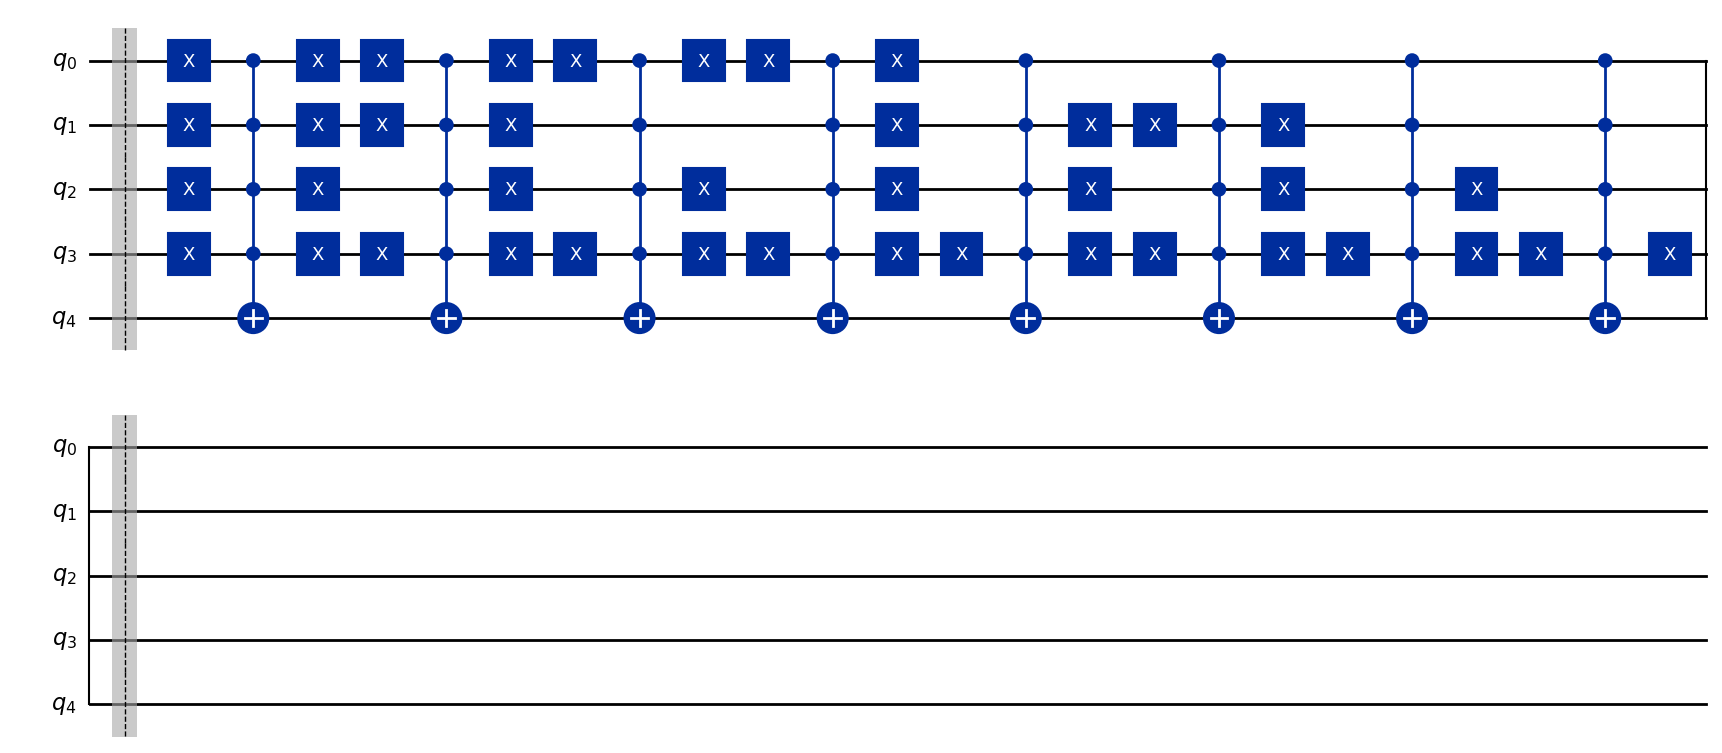

In [75]:
circuit = dj_function('1010101010101010')

circuit.draw('mpl')

## DJ2

[0, 2, 4, 6, 8, 10, 12, 14]


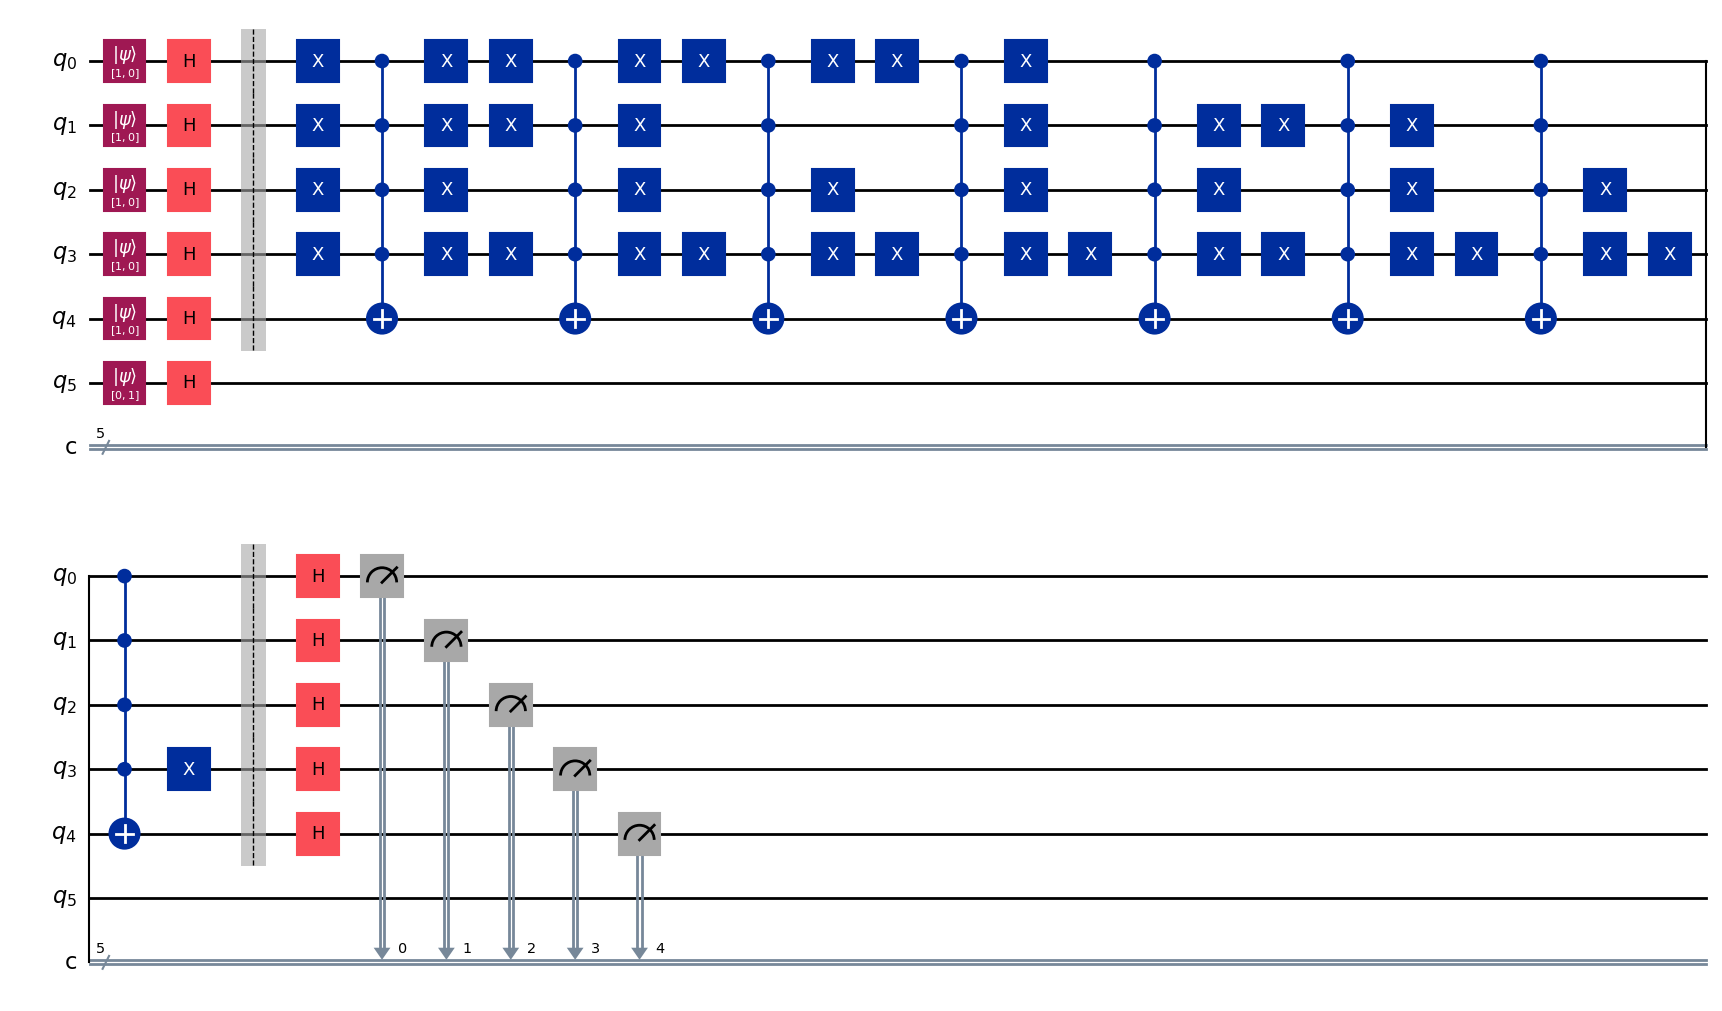

In [77]:
input_size = 5

zero_qubit = Statevector.from_label('0')
one_qubit = Statevector.from_label('1')
circuit = QuantumCircuit(input_size + 1, input_size)
for i in range(input_size):
    circuit.initialize(zero_qubit, i)
    circuit.h(i)
circuit.initialize(one_qubit, input_size)
circuit.h(input_size)


# circuit.compose(dj_function("1111000011110000"), inplace=True)
circuit.compose(dj_function("1010101010101010"), inplace=True)

for i in range(input_size):
    circuit.h(i)
    circuit.measure(i, i)

circuit.draw('mpl')

In [78]:
calculator = BasicSimulator()
transpiledScheme = transpile(circuit, calculator)
freq = calculator.run(transpiledScheme).result().get_counts()

display(freq)

{'00000': 1024}

# Bernstein-Vazirani

## BV1
Tarkime Bernstein+Vazirani funkcija yra  f(x)=s⋅x,  kur  s  yra duotas Jūsų variante. Surkurkite teisingumo lentelę šiai funkcijai. 15. s=(1,0,1,0,1).

In [62]:
s = '10101'
input_combinations = [''.join(bits) for bits in itertools.product('01', repeat=len(s))]

for input in input_combinations:
    sum = 0
    for input_bit, s_bit in zip(input, s):
        if s_bit == '1' and input_bit == '1':
            sum += 1
    print(f"{input} dot {s} = {sum%2}")
        

00000 dot 10101 = 0
00001 dot 10101 = 1
00010 dot 10101 = 0
00011 dot 10101 = 1
00100 dot 10101 = 1
00101 dot 10101 = 0
00110 dot 10101 = 1
00111 dot 10101 = 0
01000 dot 10101 = 0
01001 dot 10101 = 1
01010 dot 10101 = 0
01011 dot 10101 = 1
01100 dot 10101 = 1
01101 dot 10101 = 0
01110 dot 10101 = 1
01111 dot 10101 = 0
10000 dot 10101 = 1
10001 dot 10101 = 0
10010 dot 10101 = 1
10011 dot 10101 = 0
10100 dot 10101 = 0
10101 dot 10101 = 1
10110 dot 10101 = 0
10111 dot 10101 = 1
11000 dot 10101 = 1
11001 dot 10101 = 0
11010 dot 10101 = 1
11011 dot 10101 = 0
11100 dot 10101 = 0
11101 dot 10101 = 1
11110 dot 10101 = 0
11111 dot 10101 = 1


## BV2
Parašykite funkciją, kuri pagal nurodytą bitų skaičių generuoja atsitiktinę Bernstein-Vazirani funkciją.

In [63]:
def bv_function(s):
    qc = QuantumCircuit(len(s) + 1)
    qc.barrier()
    for index, bit in enumerate(s):
        if bit == "1":
            qc.cx(index, len(s))
    qc.barrier()
    return qc

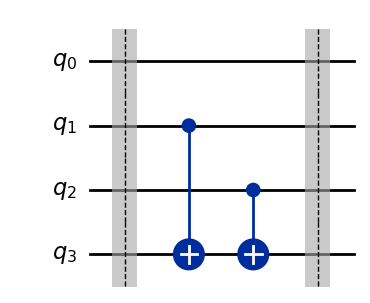

In [68]:
a_combinations = [''.join(bits) for bits in itertools.product('01', repeat=len(s))]
s = a_combinations[np.random.randint(0, len(a_combinations))]
circuit = bv_function('011')
circuit.draw('mpl')

## BV3
Parašykite klasikinę funkciją, kuri pagal n-bitų funkciją, kuri užduota kaip tekstinė eilutė (panašiai kaip DJ1 uždavinyje), patikrina ar ji yra Bernstein-Vazirani funkcija.

In [70]:
def bv_classic(input, A):
    sum = 0
    for i in range(len(input)):
        if input[i] == '1' and A[i] == '1':
            sum += 1
    return str(sum % 2)


def is_bv_func(func, input_size):
    A = '0' * input_size 
    for i in range(input_size):
        input = ('0' * input_size)
        input = input[:i] + '1' + input[i+1:]
        result = func(input)
        if result == '1':
            A = A[:i] + '1' + A[i+1:]
    
    input_combinations = [''.join(bits) for bits in itertools.product('01', repeat=len(s))]
    for input in input_combinations:
        func_result = func(input)
        bv_result = bv_classic(input, A)
        print(f"bv_result: {bv_result} func_result: {func_result}")
        if func_result != bv_result:
            return False
    return True

In [69]:
def simple(input):
    return '1'

print(is_bv_func(lambda x: bv_classic(x, "011"), 5))

IndexError: string index out of range

# Simons Algorithm

## SA1
Naudodami vartus X, CNOT, ir CCNOT sukurkite pilną kvantinę shemą 5 bitų Simono algorimui pagal duotąjį binarinį vektorių s Jūsų variantui (variantų sąrašas yra toks pats kaip ir pirmame lab. darbe).Funkcijos reikšmes tinkamai parinkite savarankiškai. s = 11011.

In [ ]:
def simon_function(s: str):
    n = len(s)
    s_num = int(s, 2)
    qc = QuantumCircuit(2 * n)
    
    # Create a set of input pairs that should generate the same output
    input_set = list(range(2**n))
    input_paired_set = []
    while len(input_set) != 0:
        x = input_set.pop(0)
        xs = x ^ s_num
        input_set.remove(xs)
        input_paired_set.append((x, xs))
    print(input_paired_set)

    all_possible_outputs_set = list(range(2**n))

    # This function creates gates that represent that the function is returning output_int value for input_int, this function needs to be called for all possible inputs of a function
    def magic_func(input_int, output_int):
        for output_index, output_bit in enumerate(f"{output_int:0{n}b}"):
            if output_bit == '1':
                for input_index, input_bit in enumerate(f"{input_int:0{n}b}"):
                    if input_bit == '0':
                        qc.x(input_index)
                qc.mcx(list(range(n)), output_index + n)
                for input_index, input_bit in enumerate(f"{input_int:0{n}b}"):
                    if input_bit == '0':
                        qc.x(input_index)
    
    # Looping through all input pairs of the function and assigning a random output
    function_definition = []
    for x, xs in input_paired_set:
        random_output = all_possible_outputs_set.pop(np.random.randint(0, len(input_paired_set)))
        # Call some magic function that sets x and xs inputs to return this output.
        magic_func(x, random_output)
        magic_func(xs, random_output)
        function_definition.append((x, random_output))
        function_definition.append((xs, random_output))
    print(function_definition)

    return qc


qc = simon_function("11110")
qc.draw('mpl')

In [ ]:
def simon_measurements(problem: QuantumCircuit, k: int):
    n = problem.num_qubits // 2

    qc = QuantumCircuit(2 * n, n)
    qc.h(range(n))
    qc.compose(problem, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))

    result = AerSimulator().run(qc, shots=k, memory=True).result()
    return result.get_memory()


simon_measurements(
    simon_function("11011"),
    k=12
)

In [ ]:
def simon_algorithm(problem: QuantumCircuit):
    measurements = simon_measurements(problem, k=problem.num_qubits // 2 + 10)
    print("Measurement results:")
    display(measurements)

    matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)

    null_space = galois.GF(2)(matrix).null_space()
    print("Null space:")
    display(null_space)

    print("Guess for hidden string s:")
    if len(null_space) == 0:
        return "0" * len(measurements[0])
    return list(reversed("".join(np.array(null_space[0]).astype(str))))


simon_algorithm(
    simon_function("01011")
)

## SA2
Vadovėlyje „ Noson S. Yanofsky and Mirco A. Mannucci. Quantum computing for computer scientists“ nuo puslapio 190 pateikta Simono algoritmo analizė konkrečiai funkcijai  {0,1}3→{0,1}3 . Naudodamiesi sympy moduliu atlkite tokią pat analizę Jūsų pasirinktai funkcijai iš ankstesnės (SA1) užduoties.

In [ ]:
def my_func(input: int) -> int:
    function_definition = [(0, 10), (11, 10), (1, 14), (10, 14), (2, 13), (9, 13), (3, 1), (8, 1), (4, 17), (15, 17), (5, 4), 
                           (14, 4), (6, 2), (13, 2), (7, 11), (12, 11), (16, 9), (27, 9), (17, 21), (26, 21), (18, 8), (25, 8), 
                           (19, 23), (24, 23), (20, 5), (31, 5), (21, 24), (30, 24), (22, 3), (29, 3), (23, 28), (28, 28)]
    for x, y in function_definition:
        if x == input:
            return y

In [ ]:
from sympy import Matrix, zeros, kronecker_product


# bit_string = '11011'
input_length = 5

# Initial state


initial_state = zeros(2**(input_length*2), 1)
initial_state[0, 0] = 1

# initial_state

In [ ]:
from sympy import Matrix, sqrt, simplify, kronecker_product
# Applying Hadamar

I = Matrix([[1, 0], [0, 1]])
H = Matrix([[1, 1], [1, -1]]) / sqrt(2)
H_big = H
for _ in range(input_length-1):
    H_big = kronecker_product(H_big, H)

I_big = I
for _ in range(input_length-1):
    I_big = kronecker_product(I_big, I)
HI_big = kronecker_product(H_big, I_big)
# HI_big

In [ ]:
state_1 = HI_big * initial_state
# state_1

In [ ]:
# Compute state 2, for each index calculate f(index.binary.str)

state_2 = zeros(2**(input_length*2), 1)
for x in range(2**input_length):
    first_half = zeros(2**input_length, 1)
    first_half[x, 0] = 1

    second_half = zeros(2**input_length, 1)
    second_half[my_func(x), 0] = 1
    state_2 += 1/sqrt(2)**input_length * kronecker_product(first_half, second_half)

state_2

In [ ]:
state_3 = zeros(2**(input_length*2), 1)
for x in range(2**input_length):
    for z in range(2**input_length):
        z_vector = zeros(2**input_length, 1)
        z_vector[z, 0] = 1
        x_vector = zeros(2**input_length, 1)
        x_vector[my_func(x), 0] = 1

        state_3 += ((-1)**(z_vector.dot(x_vector)) * kronecker_product(z_vector, x_vector))

state_3 *= (1/sqrt(2)**(input_length*3))
state_3

In [72]:
reduced_state = zeros(32, 1)


for i in range(2**10):
    # print(f"{i:0{10}b}")
    reduced_index = i >> 5
    reduced_state[reduced_index] += state_3[i]

reduced_state


for index, amplitude in enumerate(reduced_state):
    print(amplitude)
    if amplitude == sqrt(2)/8:
        print(f"{index:0{5}b}")



sqrt(2)/8
00000
7*sqrt(2)/64
7*sqrt(2)/64
7*sqrt(2)/64
7*sqrt(2)/64
7*sqrt(2)/64
sqrt(2)/8
00110
sqrt(2)/8
00111
7*sqrt(2)/64
7*sqrt(2)/64
7*sqrt(2)/64
7*sqrt(2)/64
sqrt(2)/8
01100
7*sqrt(2)/64
7*sqrt(2)/64
sqrt(2)/8
01111
sqrt(2)/8
10000
7*sqrt(2)/64
sqrt(2)/8
10010
sqrt(2)/8
10011
sqrt(2)/8
10100
7*sqrt(2)/64
sqrt(2)/8
10110
7*sqrt(2)/64
7*sqrt(2)/64
sqrt(2)/8
11001
sqrt(2)/8
11010
sqrt(2)/8
11011
7*sqrt(2)/64
sqrt(2)/8
11101
sqrt(2)/8
11110
sqrt(2)/8
11111


# Kitam kartui
DJ
Dirbtinio intelekto
Kaip nusakyt pagal duota subalansuota funkcija koks outputas laimes?
Kiek subalansuotu funkciju galim tureti?

Berstein-Vazerani 3 paduoti bitstring kuris apibrezia funkcija ir patikrintin su visais s

Simon uzbaigti pagal vadoveli